<a href="https://colab.research.google.com/github/otanerifpb/ArvoreDecisaoTE1/blob/main/ArvoreDecisaoP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importes necessário
import pandas as pd

# BD no disponível no Git Thiago Moura
url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/datasets/iris.data"

# Carregar BD, DataFrame ou DataSet, com auxílio do Pandas
dataset = pd.read_csv(url, header=None)

# Fazer a leitura das colunas do DataSet
columns = len(dataset.columns)

# Separar a coluna do Label - Targets (y), onde está a classificação
y = dataset[0]

# Definir quais colunas são os Dados - Features (X), onde: os ':' = qualquer linha, '1' = a partir da coluna 1 e 'columns-1 = até a última coluna
X = dataset.loc[:,1:columns-1]

# Prints
print(y)
print()
print('***********************************')
print(X)


0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: 0, Length: 150, dtype: int64

***********************************
       1    2    3    4
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [3]:
# Importes necessário
from sklearn.model_selection import train_test_split

# Separar os dados para Treinamentos(80%) e Testes(20%)
# Onde: 'test_size=0.2' = 20%, 'random_state=None' = Pegar dados aleatórios, 'stratify=y' = Manter a mesma proporção no treinamento
# Muito importante, rodar uma única vez, para poder realizar os treinamentos e testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y)


In [16]:
# Importes necessário
from sklearn import tree

# Diferente da separação dos dados, aqui pode rodar várias vezes
# Dirteibuir os dados em uma Árvore de Decisão
# Onde: 'criterion' = entropy/gini/manhattam
#model = tree.DecisionTreeClassifier(criterion="entropy") # 97%
#model = tree.DecisionTreeClassifier(criterion="gini") # 97% (Default)
model = tree.DecisionTreeClassifier(criterion="log_loss") # 97%

# Realizar o Treinamento (fit) com os dados(y e X)
model = model.fit(X_train, y_train)

In [18]:
# Importes necessário
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Resultado dos Treinamentos e Teste
result = model.predict(X_test)
acc = metrics.accuracy_score(result, y_test)
show = round(acc * 100)

# Print da Acurácia em porcentágem
print('Acurácia: ' + "{}%".format(show))

# Print do Treinamento e Teste
print(list(result))
print(list(y_test))

# Verificar com o professor
confusion_matrix(y_test,result)


Acurácia: 97%
[3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 1, 2, 3, 3, 1, 3, 1, 2, 3, 2, 3, 1, 3, 3, 2, 2, 3, 3]
[3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 1, 2, 3, 3, 1, 3, 1, 2, 3, 2, 3, 1, 3, 3, 2, 2, 2, 3]


array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

[Text(0.4444444444444444, 0.9444444444444444, 'x[2] <= 2.6\nlog_loss = 1.585\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.3333333333333333, 0.8333333333333334, 'log_loss = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5555555555555556, 0.8333333333333334, 'x[2] <= 4.75\nlog_loss = 1.0\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.3333333333333333, 0.7222222222222222, 'x[3] <= 1.65\nlog_loss = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.2222222222222222, 0.6111111111111112, 'log_loss = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.4444444444444444, 0.6111111111111112, 'log_loss = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.7777777777777778, 0.7222222222222222, 'x[2] <= 5.15\nlog_loss = 0.446\nsamples = 43\nvalue = [0, 4, 39]'),
 Text(0.6666666666666666, 0.6111111111111112, 'x[3] <= 1.85\nlog_loss = 0.787\nsamples = 17\nvalue = [0, 4, 13]'),
 Text(0.5555555555555556, 0.5, 'x[0] <= 6.5\nlog_loss = 0.971\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(0.4444444444444444, 0.388

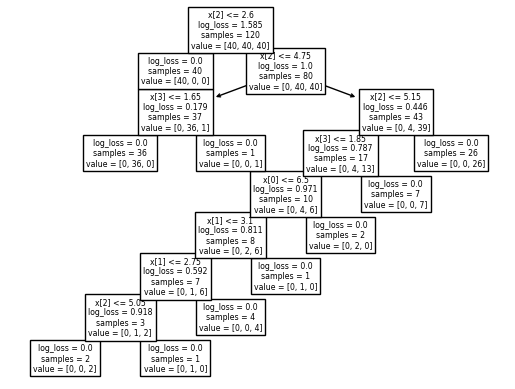

In [19]:
# Print do modelo da Árvore de Decisão
tree.plot_tree(model)
